# Chapter 1 신경망 복습

## 1.1 수학과 파이썬 복습

### 1.1.1 벡터와 행렬

- 벡터: 크기와 방향을 가진 양, 숫자가 일렬로 늘어선 집합, 1차원 배열
- 행렬: 2차원 배열, 가로는 행, 서로를 열이라 한다.
- 텐서

실제는 열벡터 방식을 사용하지만 책에서는 구현의 편의성을 위해 행벡터 사용, N개의 원소로 이뤄진 벡터는 1XN 형상의 배열로 변환해서 사용

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2, 3])
x.__class__

numpy.ndarray

In [3]:
x.ndim

1

In [4]:
W = np.array([[1,2,3], [4,5,6]])

In [5]:
W.shape

(2, 3)

In [7]:
W.ndim

2

### 1.1.2 행렬의 원소별 연산

In [8]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

In [9]:
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [10]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### 1.1.3 브로드캐스트

In [11]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [13]:
b = np.array([[10, 20]])

In [14]:
A * b

array([[10, 40],
       [30, 80]])

[브로드캐스트 규칙](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html)
1. 동일 차원의 원소 수가 같은 경우
2. 동일 차원의 원소 수 중 하나가 1인 경우

#### 브로드캐스트 예시

가능:  
A &nbsp; &nbsp; &nbsp; &nbsp; (3d array): &nbsp; 15 x 3 x 5  
B &nbsp; &nbsp; &nbsp; &nbsp; (2d array): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 3 x 1  
Result (3d array): &nbsp; 15 x 3 x 5

불가능:  
A &nbsp; &nbsp; &nbsp; &nbsp; (2d array): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2 x 1  
B &nbsp; &nbsp; &nbsp; &nbsp; (3d array): &nbsp; &nbsp; 8 x 4 x 3 

### 1.1.4 벡터의 내적과 행렬의 곱

#### 벡터의 내적

두 벡터에서 대응하는 원소를 곱한 후 모두 더한 것.  
두 벡터가 얼마나 같은 방향으로 향하는 지를 나타낸다.

#### 행렬의 곱

첫번째 행렬의 행벡터와 두번째 행렬의 열벡터의 내적으로 계산, 대응하는 행벡터와 열벡터의 원소 수는 동일해야한다.

In [15]:
# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)

32

In [16]:
# 행렬의 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.matmul(A, B)    # np.dot(A, B)와 동일하지만 벡터 내적과 행렬 곱을 구분해주기 위해 np.matmul() 사용

array([[19, 22],
       [43, 50]])

[100 numpy exercises](https://github.com/rougier/numpy-100): 넘파이 연습문제

### 1.1.5 행렬의 형상 확인

행렬 곱에서 대응하는 차원의 원소 수가 같아야 한다. 행렬 A와 B를 곱해준다면 A의 두번째 차원의 원소 수는 B의 첫번째 차원의 수와 같아야 하고 결과 C의 형상은 (A의 첫번째 차원 X B의 두번째 차원)이 된다.

## 1.2 신경망의 추론

#### 신경망의 수행 작업
1. 학습
2. 추론

In [31]:
# 완전연결 계층 미니배치 버전
import numpy as np
W1 = np.random.randn(2, 4)    # 가중치
b1 = np.random.randn(4)       # 편향
x = np.random.randn(10, 2)    # 입력
h = np.matmul(x, W1) + b1

In [32]:
h

array([[-1.75352243e+00,  4.24643661e+00,  2.03992509e+00,
         9.77577881e-01],
       [-1.03525275e+00,  1.27013130e+00,  8.13523980e-01,
        -1.01917153e+00],
       [ 1.66648680e-01,  2.58566466e-03,  5.22586798e-01,
        -1.34561238e+00],
       [-9.63853539e-02,  4.45287071e+00,  2.56574712e+00,
         2.11420046e+00],
       [-2.91368005e+00,  5.08274564e+00,  2.13707562e+00,
         9.78265093e-01],
       [-2.42213353e-02,  1.63066525e+00,  1.24561275e+00,
        -1.35225754e-01],
       [-1.05379131e+00,  1.50876584e+00,  9.21938010e-01,
        -8.36241173e-01],
       [-1.77118875e+00,  3.08820382e+00,  1.48593311e+00,
         2.67655748e-02],
       [-1.57491701e-01, -1.52170125e-01,  3.65477789e-01,
        -1.66081237e+00],
       [ 6.20287095e-01, -6.04245293e-01,  3.51860504e-01,
        -1.57309586e+00]])

In [33]:
# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [34]:
# 활성화 함수에 의한 변환
a = sigmoid(h)

In [35]:
# 추론 과정 종합
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

#### 계층 구현 규칙

1. 모든 계층은 forward(), backward() 메소드를 가진다.
2. 모든 계층은 인스턴스 변수인 params, grads를 가진다.

In [36]:
# 순전파만 구현: forward
import numpy as np

class Sigmoid:
    
    def __init__(self):
        # 시그모이드 계층은 학습할 매개변수가 없으므로 빈 리스트로 초기화
        self.params = []
        
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

class Affine:
    
    def __init__(self, W, b):
        self.params = [W, b]
        
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [40]:
# 입력-Affine-Sigmoid-Affine-점수
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트에 모은다
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        
        return x

In [41]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

## 1.3 신경망의 학습

- 손실함수
- 오차역전파법

역전파의 계산그래프
- 곱셈 노드: 입력을 서로 바꾼 값을 상류의 기울기와 곱해준다
- 분기 노드: 복제 노드
- repeat 노드: 상류의 기울기를 모두 더해서 구한다.
- sum 노드: 상류의 기울기를 모든 화살표로 전파, repeat과 sum은 서로 반대 관계에 있는 노드
- matmul 노드: 행렬의 형상을 유지해주는 방식으로 다른 입력값을 transpose한 값을 상류의 기울기와 행렬곱 해준다.

In [42]:
# repeat 노드
import numpy as np

D, N = 8, 7

x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

In [43]:
# sum 노드
import numpy as np

D, N = 8, 7

x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

In [44]:
# matmul 노드
class MatMul:
    
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        
        return out
    
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        
        return dx

#### 얕은 복사와 깊은 복사

얕은 복사  
grads[0] = dW와 같은 형식으로 메모리를 가리키기만 한다. 값을 변경하면 같이 변경된다.

깊은 복사  
grads[0][...] = dW와 같은 형식, 데이터를 덮어씌워 한 쪽의 값이 변경되도 다른 쪽은 변경되지 않는다.

In [45]:
# 시그모이드 계층 역전파까지 구현
class Sigmoid:
    
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    
    def backward(self, dout):
        dx = dout * (1.0 - self.dout) * self.dout
        
        return dx

In [46]:
# Affine 계층 역전파까지 구현
class Affine:
    
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        
        return out
    
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self, grads[1][...] = db
        
        return dx

#### Softmax with Loss 계층

softmax 계층의 역전파  
출력과 정답레이블의 차: $y_i - t_i$

### 가중치 갱신

가중치 갱신 = 경사하강법

- 확률적경사하강법(SGD)
- 모멘텀
- AdaGrad
- Adam 등

In [47]:
# SGD 구현
class SGD:
    
    def __init__(self, lr=0.01):
        self.lr = lr
        
    
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

## 1.4 신경망으로 문제를 풀다

### 1.4.1 스파이럴 데이터셋

In [48]:
from dataset import spiral
import matplotlib.pyplot as plt

In [49]:
x, t = spiral.load_data()
print('x', x.shape)    # 2차원
print('t', t.shape)    # 분류할 클래스는 3개

x (300, 2)
t (300, 3)


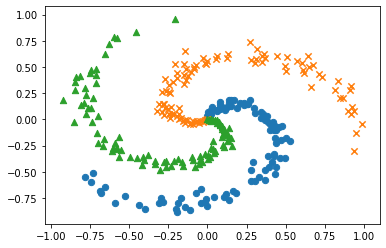

In [50]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [51]:
# 신경망 구현
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H) * 0.01
        b1 = np.zeros(H)
        W2 = np.random.randn(H, O) * 0.01
        b2 = np.zeros(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
            
        return x
    
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        
        return loss
    
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
            
        return dout

In [57]:
# 학습
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폿 %d | 반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| 에폿 1 | 반복 10 / 10 | 손실 1.13
| 에폿 2 | 반복 10 / 10 | 손실 1.13
| 에폿 3 | 반복 10 / 10 | 손실 1.12
| 에폿 4 | 반복 10 / 10 | 손실 1.12
| 에폿 5 | 반복 10 / 10 | 손실 1.11
| 에폿 6 | 반복 10 / 10 | 손실 1.14
| 에폿 7 | 반복 10 / 10 | 손실 1.16
| 에폿 8 | 반복 10 / 10 | 손실 1.11
| 에폿 9 | 반복 10 / 10 | 손실 1.12
| 에폿 10 | 반복 10 / 10 | 손실 1.13
| 에폿 11 | 반복 10 / 10 | 손실 1.12
| 에폿 12 | 반복 10 / 10 | 손실 1.11
| 에폿 13 | 반복 10 / 10 | 손실 1.09
| 에폿 14 | 반복 10 / 10 | 손실 1.08
| 에폿 15 | 반복 10 / 10 | 손실 1.04
| 에폿 16 | 반복 10 / 10 | 손실 1.03
| 에폿 17 | 반복 10 / 10 | 손실 0.96
| 에폿 18 | 반복 10 / 10 | 손실 0.92
| 에폿 19 | 반복 10 / 10 | 손실 0.92
| 에폿 20 | 반복 10 / 10 | 손실 0.87
| 에폿 21 | 반복 10 / 10 | 손실 0.85
| 에폿 22 | 반복 10 / 10 | 손실 0.82
| 에폿 23 | 반복 10 / 10 | 손실 0.79
| 에폿 24 | 반복 10 / 10 | 손실 0.78
| 에폿 25 | 반복 10 / 10 | 손실 0.82
| 에폿 26 | 반복 10 / 10 | 손실 0.78
| 에폿 27 | 반복 10 / 10 | 손실 0.76
| 에폿 28 | 반복 10 / 10 | 손실 0.76
| 에폿 29 | 반복 10 / 10 | 손실 0.78
| 에폿 30 | 반복 10 / 10 | 손실 0.75
| 에폿 31 | 반복 10 / 10 | 손실 0.78
| 에폿 32 | 반복 10 / 10 | 손실 0.77
| 에폿 33 | 반복 10 /

In [58]:
# 인덱스 뒤섞기
import numpy as np
np.random.permutation(10)

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

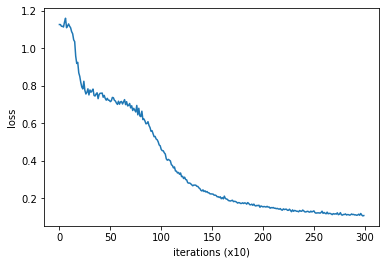

In [60]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

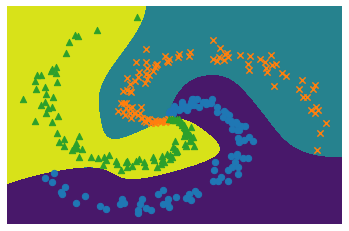

In [61]:
# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### Trainer 클래스

모델(신경망)과 옵티마이저를 인수로 받아 학습을 수행하는 역할을 하는 클래스
- fit(): 학습을 수행한다.
- plot(): fit()이 기록한 손실을 그래프로 그린다.

#### fit() 메소드

인수
- x: 입력 데이터
- t: 정답 레이블
- max_epoch(=10): 에폭 수
- batch_size(=32): 미니배치 크기
- eval_interval(=20): 결과(평균 손실 등)을 출력하는 간격
- max_grad(=None): 기울기 최대 노름, 기울기 노름이 이 값을 넘어서면 기울기를 줄인다.(기울기 클리핑)

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 203 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 204 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 205 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 206 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 207 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 208 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 209 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 210 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 211 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 212 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 213 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 214 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 215 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 216 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 217 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 218 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 219 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 220 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 221 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 222 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 223 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 224 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 225 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 226 |  반복 1 / 10 | 시간 0[s] | 

C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KJK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  f

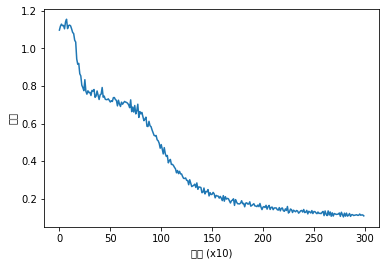

In [62]:
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

## 1.5 계산 고속화

### 1.5.1 비트 정밀도

넘파이 기본: 64비트 부동소수점

In [63]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

#### 32비트와 64비트
- 인식률 측면: 거의 동일
- 메모리 효율 측면: 32비트 유리
- 버스 대역폭 측면: 32비트 유리
- 계산 속도 측면: 일반적으로 32비트 유리

버스 대역폭(bus bandwidth): 데이터를 주고 받는 통로

이 책에서는 32비트 부동소수점을 우선적으로 사용

In [64]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [65]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

#### 16비트 부동소수점
- 신경망 추론 한정, 인식률 거의 비슷
- 계산 속도 측면에서는 이점이 없을 수도 - 컴퓨터는 기본적으로 32비트로 계산하기 때문
- 학습된 가중치를 저장할 땐 유리 - 용량이 적기 때문에 - 가중치 저장은 16비트로

#### GPU와 TPU
- GPU: 16비트 반정밀도까지 지원
- TPU: 8비트 계산 지원

### 1.5.2 GPU(쿠파이)

병렬 계산은 CPU보다 GPU가 유리하다. 대부분의 프레임워크가 GPU를 지원한다.

#### 쿠파이

- GPU를 이용해 병렬 계산을 수행해주는 라이브러리, 엔비디아 GPU만 지원
- CUDA(GPU 전용 범용 병렬 컴퓨팅 플랫폼) 설치 필요

In [1]:
import cupy as cp

In [2]:
x = cp.arange(6).reshape(2, 3).astype('f')

In [3]:
x

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

In [4]:
x.sum(axis=1)

array([ 3., 12.], dtype=float32)

cupy는 numpy와 유사한 부분이 많아서 대체하기 쉽다.